Load genome from genbank and create Karyotype
========================

In [1]:
from pyrcos import utils
from Bio import SeqIO

In [2]:
record = SeqIO.read("../data/MG1655.gb", "gb")
karyotype = utils.convert_seq_records_to_karyotype([record])

In [3]:
print(karyotype)

chr - NC_000913.3 NC_000913 1 4641652 white


Load PaxDb Dataset

In [4]:
from pyrcos.datasets import protein_abundance

In [5]:
abundance = protein_abundance.read_paxdb("../data/paxdb.ecoli.integrated.txt")
positions = {f.qualifiers["locus_tag"][0]: [f.location.start, f.location.end, record.id] 
             for f in record.features if f.type == "gene"}

abundance_file = protein_abundance.convert_abundance_to_file(abundance, positions)

Create circos objects

In [6]:
from pyrcos.objects import Circos, Heatmap, Ideogram

In [7]:
heatmap = Heatmap(abundance_file, "1.02r", "1.07r")
circos = Circos(karyotype, plots=heatmap, circos_path="/Users/joao/Documents/circos-0.67-7/")

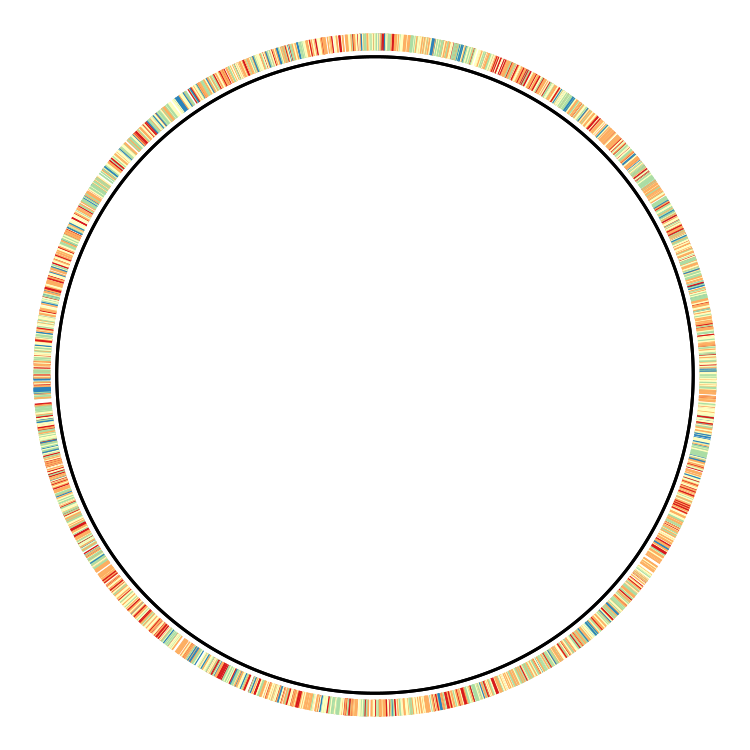

''

In [8]:
circos._repr_html_